In [46]:
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('production_line_optimization_first_log.csv')
df_sanitized = df.drop(df.columns[0], axis=1).drop_duplicates()
df_sorted = df_sanitized.sort_values(by=["time"])

dfArrA = []
dfArrB = []
dfArrC = []
dfArrD = []
for x in range (1,22):
    dfArrA.append(df_sanitized[df_sanitized["job_id"] == x].sort_values(by=["time"]))
for x in range (22,40):
   dfArrB.append(df_sanitized[df_sanitized["job_id"] == x].sort_values(by=["time"]))
for x in range (40,66):
   dfArrC.append(df_sanitized[df_sanitized["job_id"] == x].sort_values(by=["time"]))
for x in range (66,74):
   dfArrD.append(df_sanitized[df_sanitized["job_id"] == x].sort_values(by=["time"]))


In [47]:

dfAllA = pd.concat(dfArrA).sort_values(["time"])

dict = {}
for y in range (1,3):
    module = dfAllA[dfAllA["module"] == y]
    times = []
    job_ids = []
    for x in range (1,22):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        if (len(job[job["state"] == "waiting_on_next"]) > 0):
            end = job[job["state"] == "waiting_on_next"]["time"].values[0]
        else:
            end = job[job["state"] == "storing_job"]["time"].values[0]
        job_ids.append(x)
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    dict["job_ids"] = job_ids
    dict["modul"+str(y)+"times"] = times

module = dfAllA[dfAllA["module"] == 3]
times = []
for x in range (1,22):
    if (x < 21):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        job = module[module["job_id"] == x+1]
        if (len(job[job["state"] == "waiting_on_precedent"]) > 0):
            end = job[job["state"] == "waiting_on_precedent"]["time"].values[0]
        else:
            end = job[job["state"] == "fetching_job"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    else :
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        end = job[job["state"] == "idle"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
dict["modul3times"] = times
print(dict)

pd.DataFrame.from_dict(dict).to_csv("line_a_modultimes.csv")
        

{'job_ids': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'modul1times': [4275.245, 2143.2206, 1736.9784, 2656.0784, 3175.21, 2420.7888, 1939.1804, 2729.6064, 2944.6758, 2257.189, 612.0, 1266.22, 1654.2594, 2338.0698, 4175.22, 2768.2086, 612.0, 2970.4106, 2054.987, 2304.9822, 2545.7864], 'modul2times': [3591.722199, 2661.593, 3575.1784, 612.0, 3360.109, 3088.0554, 3942.8184, 2740.6356, 3521.8706, 612.0, 4275.5326, 3668.9266, 2343.5844, 3527.3852, 3538.4144, 3703.8524, 3225.9204, 2788.4288, 3367.4618, 3135.8486, 2713.0626], 'modul3times': [2551.300999, 2341.7462, 2804.9726, 2959.3814, 2159.7644, 612.0, 2286.6002, 2540.2718, 1793.9626, 4091.7126, 2678.1368, 2538.4336, 2080.7218, 3209.3766, 2547.6246, 2361.9664, 2367.481, 2895.0444, 612.0, 2520.0516, 2974.087]}


In [48]:

dfAllB = pd.concat(dfArrB).sort_values(["time"])

dict = {}
for y in range (1,6):
    module = dfAllB[dfAllB["module"] == y]
    times = []
    job_ids = []
    for x in range (22,40):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        if (len(job[job["state"] == "waiting_on_next"]) > 0):
            end = job[job["state"] == "waiting_on_next"]["time"].values[0]
        else:
            end = job[job["state"] == "storing_job"]["time"].values[0]
        job_ids.append(x)
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    dict["job_ids"] = job_ids
    dict["modul"+str(y)+"times"] = times

print(dfAllB)
module = dfAllB[dfAllB["module"] == 6]
times = []
for x in range (22,40):
    if (x < 39):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        job = module[module["job_id"] == x+1]
        if (len(job[job["state"] == "waiting_on_precedent"]) > 0):
            end = job[job["state"] == "waiting_on_precedent"]["time"].values[0]
        else:
            end = job[job["state"] == "fetching_job"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    else :
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        end = job[job["state"] == "idle"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
dict["modul6times"] = times
print(dict)

pd.DataFrame.from_dict(dict).to_csv("line_b_modultimes.csv")

     line  module  job_id                 state                        time
746     B       6      22  waiting_on_precedent         2022-02-18T01:00:00
97      B       5      22  waiting_on_precedent         2022-02-18T01:00:00
226     B       4      22  waiting_on_precedent         2022-02-18T01:00:00
908     B       1      22          fetching_job         2022-02-18T01:00:00
868     B       2      22  waiting_on_precedent         2022-02-18T01:00:00
...   ...     ...     ...                   ...                         ...
660     B       5      39           storing_job  2022-02-18T20:14:25.939839
1397    B       6      39          fetching_job  2022-02-18T20:21:03.939839
645     B       5      39                  idle  2022-02-18T20:21:03.939839
1126    B       6      39            processing  2022-02-18T20:27:41.939839
1220    B       6      39                  idle  2022-02-18T21:09:03.509840

[365 rows x 5 columns]
{'job_ids': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,

In [49]:

dfAllC = pd.concat(dfArrC).sort_values(["time"])

dict = {}
for y in range (1,7):
    module = dfAllC[dfAllC["module"] == y]
    times = []
    job_ids = []
    for x in range (40,66):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        if (len(job[job["state"] == "waiting_on_next"]) > 0):
            end = job[job["state"] == "waiting_on_next"]["time"].values[0]
        else:
            end = job[job["state"] == "storing_job"]["time"].values[0]
        job_ids.append(x)
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    dict["job_ids"] = job_ids
    dict["modul"+str(y)+"times"] = times

module = dfAllC[dfAllC["module"] == 7]
times = []
for x in range (40,66):
    if (x < 65):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        job = module[module["job_id"] == x+1]
        if (len(job[job["state"] == "waiting_on_precedent"]) > 0):
            end = job[job["state"] == "waiting_on_precedent"]["time"].values[0]
        else:
            end = job[job["state"] == "fetching_job"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    else :
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        end = job[job["state"] == "idle"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
dict["modul7times"] = times
print(dict)

pd.DataFrame.from_dict(dict).to_csv("line_c_modultimes.csv")

{'job_ids': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65], 'modul1times': [1773.7408, 1504.3262, 1649.7624, 1282.5956, 286.0, 934.502399, 1318.3586, 286.0, 1022.7178, 286.0, 1344.584801, 5652.8342, 286.0, 1370.811, 1292.1324, 286.0, 1346.969, 1304.0534, 1110.9332, 965.497, 1408.9582, 805.7556, 286.0, 1139.543599, 1344.5848, 1382.732001], 'modul2times': [286.0, 286.0, 286.0, 286.0, 1299.285, 286.0, 286.0, 1211.0696, 286.0, 286.0, 1239.68, 1349.3532, 1187.2276, 286.0, 286.0, 1027.4862, 927.3498, 286.0, 286.0, 1196.7644, 286.0, 286.0, 286.0, 286.0, 286.0, 286.0], 'modul3times': [286.0, 286.0, 286.0, 1311.206, 1442.336999, 286.0, 286.0, 286.0, 1130.0068, 1127.6226, 286.0, 1146.6962, 1103.7806, 286.0, 286.0, 286.0, 286.0, 1213.4538, 1153.8488, 1346.969, 812.9082, 834.366, 1120.47, 1406.574, 829.5976, 822.445], 'modul4times': [286.0, 286.0, 286.0, 286.0, 286.0, 786.682001, 824.8292, 286.0, 286.0, 1161.0014, 286.0, 286.0, 286.0, 1029.

In [50]:

dfAllD = pd.concat(dfArrD).sort_values(["time"])

dict = {}
for y in range (1,4):
    module = dfAllD[dfAllD["module"] == y]
    times = []
    job_ids = []
    for x in range (66,74):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        if (len(job[job["state"] == "waiting_on_next"]) > 0):
            end = job[job["state"] == "waiting_on_next"]["time"].values[0]
        else:
            end = job[job["state"] == "storing_job"]["time"].values[0]
        job_ids.append(x)
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    dict["job_ids"] = job_ids
    dict["modul"+str(y)+"times"] = times

module = dfAllD[dfAllD["module"] == 4]
times = []
for x in range (66,74):
    if (x < 73):
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        job = module[module["job_id"] == x+1]
        if (len(job[job["state"] == "waiting_on_precedent"]) > 0):
            end = job[job["state"] == "waiting_on_precedent"]["time"].values[0]
        else:
            end = job[job["state"] == "fetching_job"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
    else :
        job = module[module["job_id"] == x]
        start = job[job["state"] == "fetching_job"]["time"].values[0]
        end = job[job["state"] == "idle"]["time"].values[0]
        times.append((datetime.datetime.fromisoformat(end)-datetime.datetime.fromisoformat(start)).total_seconds())
dict["modul4times"] = times
print(dict)

pd.DataFrame.from_dict(dict).to_csv("line_d_modultimes.csv")

{'job_ids': [66, 67, 68, 69, 70, 71, 72, 73], 'modul1times': [974.865, 1184.6746, 962.944, 1729.55, 729.2924, 1220.4376, 822.2762, 1170.3694], 'modul2times': [1125.0696, 688.761, 936.7178, 960.5598, 1039.2384, 924.7968, 1141.759, 1036.8542], 'modul3times': [1685.356599, 1823.640199, 1077.3856, 1406.4052, 1785.493, 1272.89, 6215.3366, 1194.2114], 'modul4times': [977.2492, 1146.5274, 1024.9332, 1156.064201, 1604.2938, 1337.2634, 1826.0244, 1752.1142]}


In [51]:
df = pd.read_csv("line_a_modultimes.csv")
for index, row in df.iloc[: , 2:].iterrows():
    df.loc[index, "diff"] = row.max()-row.min()

df.sort_values(by=["diff"], inplace=True)
jobIds = np.array(df["job_ids"])
jobIds = np.flip(jobIds)
jobIds

array([11, 10, 19, 17,  6, 12,  4,  7,  3,  9,  1, 15, 16,  5, 14, 20, 13,
        2, 21,  8, 18], dtype=int64)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.iloc[: , 2:])
print(pca.components_)

[[-0.62644812  0.11994538 -0.10484886  0.76300889]
 [-0.01565233 -0.84703135  0.4967271   0.18856057]]


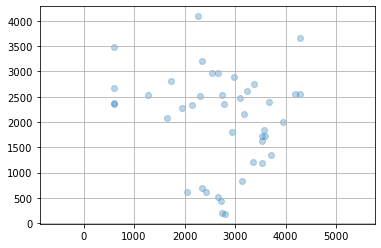

In [53]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df.iloc[: , 2:4], df.iloc[: , 4:6], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
plt.axis('equal')
plt.grid()

In [54]:
df = pd.read_csv("line_b_modultimes.csv")
for index, row in df.iloc[: , 2:].iterrows():
    df.loc[index, "diff"] = row.max()-row.min()

df.sort_values(by=["diff"], inplace=True)
jobIds = np.array(df["job_ids"])
jobIds = np.flip(jobIds)
jobIds

array([25, 39, 32, 37, 29, 23, 31, 27, 22, 34, 38, 26, 24, 28, 30, 36, 33,
       35], dtype=int64)

[[ 0.27083812 -0.29573461  0.3811852   0.51379689  0.45424863  0.32795318
   0.34059249]
 [-0.16403211 -0.20595274 -0.5459337   0.24111406 -0.23267738 -0.19301698
   0.69505613]]
[1737604.60479724 1333096.64372789]


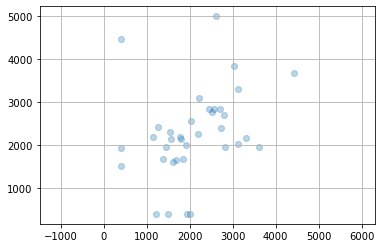

In [55]:

pca = PCA(n_components=2)
pca.fit(df.iloc[: , 2:])
print(pca.components_)
print(pca.explained_variance_)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df.iloc[: , 2:4], df.iloc[: , 4:6], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
plt.axis('equal')
plt.grid()

In [56]:
df = pd.read_csv("line_c_modultimes.csv")
for index, row in df.iloc[: , 2:].iterrows():
    df.loc[index, "diff"] = row.max()-row.min()

df.sort_values(by=["diff"], inplace=True)
jobIds = np.array(df["job_ids"])
jobIds = np.flip(jobIds)
jobIds

array([43, 51, 40, 42, 41, 56, 64, 57, 44, 60, 63, 46, 65, 53, 59, 50, 54,
       58, 49, 61, 47, 55, 52, 48, 62, 45], dtype=int64)

[[ 0.35229864  0.02150521  0.08336368 -0.03867398  0.53385376 -0.00411222
  -0.07039843  0.75960867]
 [ 0.71425     0.07041999 -0.071186    0.00190578 -0.67329959  0.0654932
  -0.03397022  0.1450559 ]]


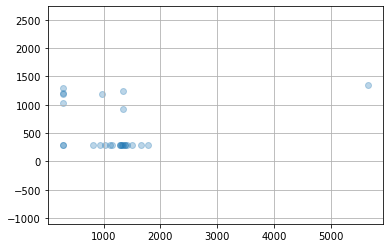

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.iloc[: , 2:])
print(pca.components_)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df.iloc[: , 2:3], df.iloc[: , 3:4], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
plt.axis('equal')
plt.grid()

In [58]:
df = pd.read_csv("line_d_modultimes.csv")
for index, row in df.iloc[: , 2:].iterrows():
    df.loc[index, "diff"] = row.max()-row.min()

df.sort_values(by=["diff"], inplace=True)
jobIds = np.array(df["job_ids"])
jobIds = np.flip(jobIds)
jobIds

array([72, 67, 70, 69, 73, 66, 71, 68], dtype=int64)

[[-0.04945036  0.02492878  0.70666153  0.08178723  0.70062369]
 [ 0.79984282 -0.1650397   0.07177594 -0.56980288  0.05644693]]


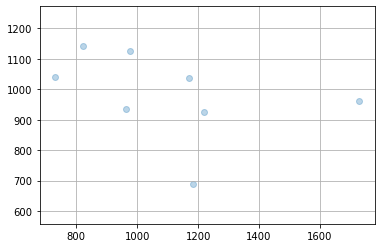

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.iloc[: , 2:])
print(pca.components_)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df.iloc[: , 2:3], df.iloc[: , 3:4], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
plt.axis('equal')
plt.grid()